In [9]:
!pip install wordcloud
import wordcloud
import numpy as np               
import pandas as pd              
import string 
import nltk
#The VADER lexicon is a list of words with associated sentiment scores, helping in sentiment analysis.
nltk.download('vader_lexicon')
import spacy      #Imports the spaCy library, a natural language processing (NLP) library.                 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import wordcloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\riddh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
nlp=spacy.load('en_core_web_sm')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [15]:
df=pd.read_csv("Elon_musk.csv",encoding='cp1252')
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [16]:
len(df)

1999

In [13]:
df.Text

0                                  @kunalb11 I’m an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

# Text Preprocessing

In [19]:
df_1 = [x.strip() for x in df.Text] # remove both the leading and the trailing characters
df_2 = [x for x in df_1 if x] # removes empty strings, because they are considered in Python as False
df_2[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

# Removing Punctuation

In [20]:
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    return text
clean = lambda x: clean_text(x) 

In [21]:
df['text'] = df.Text.apply(clean)

df['text']

0                                     kunalb  im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                           gtera  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                             progress update august  
Name: text, Length: 1999, dtype: object

In [22]:
df

,Unnamed: 0,Text,text
0,1,@kunalb11 I’m an alien,kunalb im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...
...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is


# Stop Words removal

In [27]:
stop_word=pd.read_csv("stop.txt",header=None)

st_word = [i for i in stop_word[0]]

In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riddh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [33]:
stop= stopwords.words('english')
my_stop_words=stop.copy()
#add more stop words
for i in st_word:
    my_stop_words.append(i)
    print(len(my_stop_words))
print(len(my_stop_words))
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stop_words))

180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429


# Sentiment Analysis

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [35]:
sid = SentimentIntensityAnalyzer()
def sentiment_score(text):
    
    sentiment_dict = sid.polarity_scores(text)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    
    # decide sentiment as positive , negative and neutral
    if sentiment_dict['compound'] >=0.05 :
        print("Positive")
        
    elif sentiment_dict['compound'] <= - 0.05:
        print("Negative")
       
    else :
        print("Neutral")

In [36]:
x=SentimentIntensityAnalyzer().polarity_scores(df['text'][2])

x=SentimentIntensityAnalyzer().polarity_scores(df['text'][4])
df['text'][4]

'teslacn congratulations tesla china amazing execution year'

In [37]:
x

{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'compound': 0.8271}

In [38]:
df['scores']=df['text'].apply(lambda text: sid.polarity_scores(text))
df.head()

,Unnamed: 0,Text,text,scores
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp..."


In [39]:
df['compound']=df['scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,Unnamed: 0,Text,text,scores,compound
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271


In [40]:
df['neg']=df['scores'].apply(lambda score_dict: score_dict['neg'])
df.head()

,Unnamed: 0,Text,text,scores,compound,neg
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000


In [41]:
df['pos']=df['scores'].apply(lambda score_dict: score_dict['pos'])
df.head()

,Unnamed: 0,Text,text,scores,compound,neg,pos
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000,0.577
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512,0.000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000,0.606


In [42]:
df['neu']=df['scores'].apply(lambda score_dict: score_dict['neu'])
df.head()

,Unnamed: 0,Text,text,scores,compound,neg,pos,neu
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000,0.577,0.423
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512,0.000,0.488
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000,0.606,0.394


In [43]:
df['comp_score']=df['compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')
df.head()

,Unnamed: 0,Text,text,scores,compound,neg,pos,neu,comp_score
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000,0.577,0.423,pos
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512,0.000,0.488,neg
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000,0.606,0.394,pos


In [44]:
df['neg'].value_counts()

0.000    1734
0.231       6
0.252       5
0.247       5
0.097       5
         ... 
0.206       1
0.090       1
0.605       1
0.397       1
0.220       1
Name: neg, Length: 172, dtype: int64

In [45]:
df['pos'].value_counts()

0.000    1277
0.375      16
0.672      14
0.412      12
0.600      11
         ... 
0.649       1
0.238       1
0.341       1
0.709       1
0.317       1
Name: pos, Length: 309, dtype: int64

In [46]:
df['compound'].value_counts()

 0.0000    1114
 0.6249      54
 0.4588      49
 0.4215      46
 0.4404      42
           ... 
 0.7891       1
-0.4912       1
 0.7269       1
 0.8155       1
-0.7351       1
Name: compound, Length: 141, dtype: int64

In [47]:
df['neu'].value_counts()

1.000    1106
0.625      19
0.588      17
0.328      14
0.833      12
         ... 
0.654       1
0.524       1
0.522       1
0.808       1
0.380       1
Name: neu, Length: 330, dtype: int64

In [48]:
from nltk.tokenize import word_tokenize
text_1= [x.strip() for x in df.text] # remove both the leading and the trailing characters
text_2= [x for x in text_1 if x] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
text_3 = ' '.join(text_2)
len(text_3)

107235

In [49]:
import nltk
nltk.download('punkt')
df_token= word_tokenize(text_3)
df_token

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riddh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['kunalb',
 'im',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'year',
 'happy',
 'year',
 'ox',
 'httpstco',
 'wfkmyu',
 'oj',
 'frodo',
 'underdogeall',
 'thought',
 'failhimself',
 'httpstcozgxjfdzzrm',
 'owensparks',
 'flcnhvy',
 'anonyx',
 'haha',
 'flcnhvy',
 'anonyx',
 'tweets',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertaining',
 'outcome',
 'givedirectly',
 'agree',
 'clubhouse',
 'kanyewest',
 'httpstco',
 'rwe',
 'uhsts',
 'geoffkeighley',
 'unrealengine',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'joshmanmode',
 'issues',
 'sentencing',
 'bit',
 'high',
 'freewalletorg',
 'fixing',
 'freewalletorg',
 'unlock',
 'account',
 'astrojordy',
 'true',
 'power',
 'haha',
 'httpstcofc',
 'uhqsd',
 'freewalletorg',
 'crypto',
 'wallet',
 'wont'

In [50]:
lower_words = [x.lower() for x in df_token]
print(lower_words[0:25])

['kunalb', 'im', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year']


# Stemming

In [51]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb', 'im', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'year', 'happi', 'year', 'ox', 'httpstco', 'wfkmyu', 'oj', 'frodo', 'underdogeal', 'thought', 'failhimself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx', 'haha', 'flcnhvi', 'anonyx']


# removing stop words

In [52]:
no_stop_stemmed= [word for word in stemmed_tokens if not word in my_stop_words]

In [53]:
print(len(stemmed_tokens))
print(len(no_stop_stemmed))

12963
12869


In [55]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Lemmatization

In [56]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(''.join(no_stop_stemmed))
print(doc[0:40])

kunalbimalienidaacarmackraytracecyberpunkhdrnextleveljoeroganspotifigreatinterviewgteradogeunderestimteslacncongratulteslachinaamazexecutyearhappiyearoxhttpstcowfkmyuojfrodounderdogealthoughtfailhimselfhttpstcozgxjfdzzrmowensparkflcnhvianonyxhahaflcnhvianonyxtweetrepresrealworldtimeallocentertainoutcomgivedirectliagreclubhouskanyewesthttpstcorweuhstgeoffkeighleyunrealenginrealboughtdogecoinliltoddlerhodlerjoshmanmodissusentencbithighfreewalletorgfixfreewalletorgunlockaccountastrojorditruepowerhahahttpstcofcuhqsdfreewalletorgcryptowalletwontgiveprivatkeyavoidcostfreewalletorgappsuckrtspacexnasaselectfalconheavilaunchelementlunargatewaymissionhttpstcopwtajtourvilblkmdlrationaletiennadamklotzpredictcashflowstarlinkiporationaletiennadamklotzstarlinkstaggeringlidifficulttechnicampeconomendeavorhttpstcoacskqxrationaletiennadamklotzspacexpassdeepchasmnegcashflowyearhttpstcohdjlidaacarmacklowestcosttoncarbonsequestnetproductmadescalablhttpstcoxmyiqwsgwadamklotzmeantpricecountridiffertaxampship

In [58]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalbimalienidaacarmackraytracecyberpunkhdrnextleveljoeroganspotifigreatinterviewgteradogeunderestimteslacncongratulteslachinaamazexecutyearhappiyearoxhttpstcowfkmyuojfrodounderdogealthoughtfailhimselfhttpstcozgxjfdzzrmowensparkflcnhvianonyxhahaflcnhvianonyxtweetrepresrealworldtimeallocentertainoutcomgivedirectliagreclubhouskanyewesthttpstcorweuhstgeoffkeighleyunrealenginrealboughtdogecoinliltoddlerhodlerjoshmanmodissusentencbithighfreewalletorgfixfreewalletorgunlockaccountastrojorditruepowerhahahttpstcofcuhqsdfreewalletorgcryptowalletwontgiveprivatkeyavoidcostfreewalletorgappsuckrtspacexnasaselectfalconheavilaunchelementlunargatewaymissionhttpstcopwtajtourvilblkmdlrationaletiennadamklotzpredictcashflowstarlinkiporationaletiennadamklotzstarlinkstaggeringlidifficulttechnicampeconomendeavorhttpstcoacskqxrationaletiennadamklotzspacexpassdeepchasmnegcashflowyearhttpstcohdjlidaacarmacklowestcosttoncarbonsequestnetproductmadescalablhttpstcoxmyiqwsgwadamklotzmeantpricecountridiffertaxampsh

# Feature Extraction

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
X

<45x23 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [67]:
X.shape

(45, 23)

In [68]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df.head()

andturnsdganandmahindrametnigeorgeriksolheimberniehollywoodnorwayleadworldnasaspaceflightpasscryoproofjohnkrausphotosuperclusterhqspacexajtourvilyeahcontestadvanccastcrushbestcasprintcastdoesntworkwelhttpstcouscsepaqastrofarmerbobastropettitastrokomradastroannimgreatpicjohnkrausphotopatreonsuperclusterhqspacexflagmartashaarkadditmanufacturpartcostlicarrapidlicreattoolaccelhttpstcozkxjtumjrenatakonkolifranktinsleyankitxuptatashaarkprettiendhighnotertspacexstarmanleavearthmadecloseapproachmartoday  \
0                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
2                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
3                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
4                                                  0                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

   collectdatamilliongalaxiexplorrtspacexfalconlaunchstarlinksatellitorbit  \
0                                                  0                         
1                                                  0                         
2                                                  1                         
3                                                  0                         
4                                                  0                         

   crewdragonarrivspacestmaisiewilliamtossbitcoinurwitcherkristennettenrtnasaentercrewdragonpmestpmutcnasaspacexcrewastronautgivelivetourspacewhatsupfrankmichaelminalabcurevacmodernaampteslamakemachincurevacknhttpstcokveprqrlmichaelminalabcreatsynthetmrnacuresvaccinfuturmedicinimoturnhttpstcoypdjawikgaertnerannneuroskeptdresdenteajudithherbhahamichaelminalabgreatthreadsamtalksteslaimsymptompastdayfatiguchanghttpstcoeoxbsflaunchminutflcnhviyeahcoolchannelintegrchamberwallpropelabortorbit

In [69]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(30)
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).tail

<bound method NDFrame.tail of                                                      0
andturnsdganandmahindrametnigeorgeriksolheimber...   0
collectdatamilliongalaxiexplorrtspacexfalconlau...   1
crewdragonarrivspacestmaisiewilliamtossbitcoinu...   2
dragondockspacesthttpstcoijbmclongorificalienme...   3
eighthlaunchlandboosterhttpstcozyjzddfqlkellyre...   4
falconbuhttpstcocgeweqniflcnhviprogressaccelerr...   5
gtchhttpstcofqzotwqtengineersfeorbitspacephoton...   6
kunalbimalienidaacarmackraytracecyberpunkhdrnex...   7
leasmodelampmodelhttpstcogyfbnextspaceflightpay...   8
majorsoftwarimprovplaceextendlifeampcleantechni...   9
makeproductampprovidgreatservic                     10
matteriupsychdoctoraocrobinhoodapptanstaaflsmal...  11
missionpaddeckhttpstcocucbgpnxmikkodarudeviltru...  12
modeldeliveri                                       13
prohttpstcorybcmrblaurenrowkarpathiengineersfei...  14
reahttpstcojwdcjarymjercxspaccatchsuperheaviboo...  15
runneuralnethttpstcodfwlhxucejwanga

In [70]:
#Bi-gram
def get_top_n2_words(corpus,ngram_range, n=None):
    vec1 = CountVectorizer(ngram_range=ngram_range,  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(df["text"],ngram_range=(3,3), n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex falcon,17
1,spacex falcon stage,8
2,thesheetztweetz waemd spacex,8
3,jgrano teslaratiteam teslarati,8
4,ppathole thesheetztweetz waemd,7


In [71]:
get_top_n2_words(df["text"],ngram_range=(3,3), n=200) #trigram

[('rt spacex falcon', 17),
 ('spacex falcon stage', 8),
 ('thesheetztweetz waemd spacex', 8),
 ('jgrano teslaratiteam teslarati', 8),
 ('ppathole thesheetztweetz waemd', 7),
 ('waemd spacex spacexstarlink', 7),
 ('falcon stage landed', 6),
 ('rt spacex liftoff', 6),
 ('spacex spacexstarlink wanationalguard', 6),
 ('spacex felixschlang marcushousegame', 5),
 ('rt spacex dragon', 5),
 ('rt spacex crew', 5),
 ('neopork casparstanley ercxspace', 5),
 ('casparstanley ercxspace marcushousegame', 5),
 ('ercxspace marcushousegame felixschlang', 5),
 ('erdayastronaut joshbickett ajtourville', 4),
 ('joshbickett ajtourville spacex', 4),
 ('spacex falcon launches', 4),
 ('tjcooney lrocket spacex', 4),
 ('lrocket spacex felixschlang', 4),
 ('landed love droneship', 4),
 ('mirojurcevic tashaark spacestation', 4),
 ('dragons operational mission', 4),
 ('rt spacex deployment', 4),
 ('kristennetten boringcompany tesla', 4),
 ('brendan bocachicagal nasaspaceflight', 4),
 ('alexavoigt mikezimon wholemar

Text(0.5, 1.0, 'WordCloud')

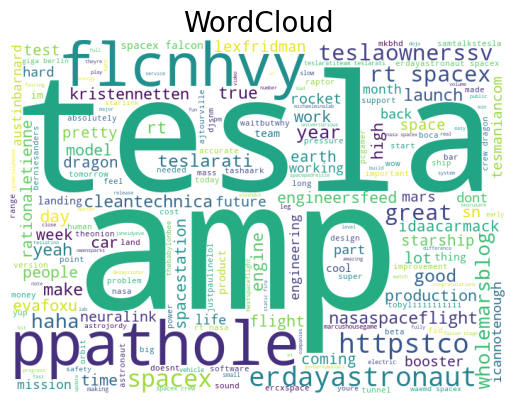

In [72]:
txt = ' '.join(df['text'])

wc = WordCloud(background_color='white', width=700, height=500).generate(txt)

plt.imshow(wc)
plt.axis('off')
plt.title('WordCloud',size = 20)